# Classifying Red Wine Quality
> Name: Sharun Garg  
Student ID: 200493338

## 1. Importing the important libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
import tensorflow.feature_column as fc
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore")

Init Plugin
Init Graph Optimizer
Init Kernel


### Reading the data

In [2]:
data = pd.read_csv('winequality-red.csv')
data.sample(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
159,6.8,0.60,0.18,1.9,0.079,18.0,86.0,0.9968,3.59,0.57,9.3,6
540,9.2,0.59,0.24,3.3,0.101,20.0,47.0,0.9988,3.26,0.67,9.6,5


### Dataset Columns


Feature Variables
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol 
  
Output variable (based on sensory data):
- quality (score between 3 and 8)

### Doing the renaming of columns to remove whitespaces

In [3]:
data = data.rename(columns={"fixed acidity": "fixed_acidity", 
                     "volatile acidity": "volatile_acidity", 
                     "citric acid": "citric_acid",
                     "residual sugar": "residual_sugar",
                     "free sulfur dioxide": "free_sulfur_dioxide",
                     "total sulfur dioxide": "total_sulfur_dioxide"
                    })

### Splitting the data into feature set and label setm

In [4]:
data_copy = data.copy()
features = data_copy.drop(['quality'], axis = 1)
labels = data_copy['quality']

### Data Shape

In [5]:
print(f'Data Shape: {data.shape}')
print(f'Features Shape: {features.shape}')
print(f'Labels Shape: {labels.shape}')

Data Shape: (1599, 12)
Features Shape: (1599, 11)
Labels Shape: (1599,)


> **Our data has 1599 entries with 12 columns. 11 of them are features and the last column is of quality**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


> **There are no null values in data and our data is complete. The datatypes are also all numbers, so we won't need to encode any variables.**

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


> The Standard Deviation for 'free sulfur dioxide' and 'total sulfur dioxide' is quite high meaning data for these two variables is very dispersed.  
Also the difference between 75th percentile and Max values for 'free sulfur dioxide', 'total sulfur dioxide' and 'residual sugar' is a lot indicating the presence of some outliers.

**Checking for Null values**

In [8]:
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

> There are no null values and our data is complete

**The quality variable analysis**

In [9]:
labels.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

> Most of the data points are for quality 5, 6 and 7, so we might expect a low performance when predicting qualities of 3, 4 and 8.

**Encoding the quality variables to continous values starting from 0 for DNN Classifier**

In [10]:
enc = {3:0, 4:1, 5:2, 6:3, 7:4, 8:5}
labels_enc = labels.replace(enc)

In [11]:
labels_enc.value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

### Heatmap

<AxesSubplot:>

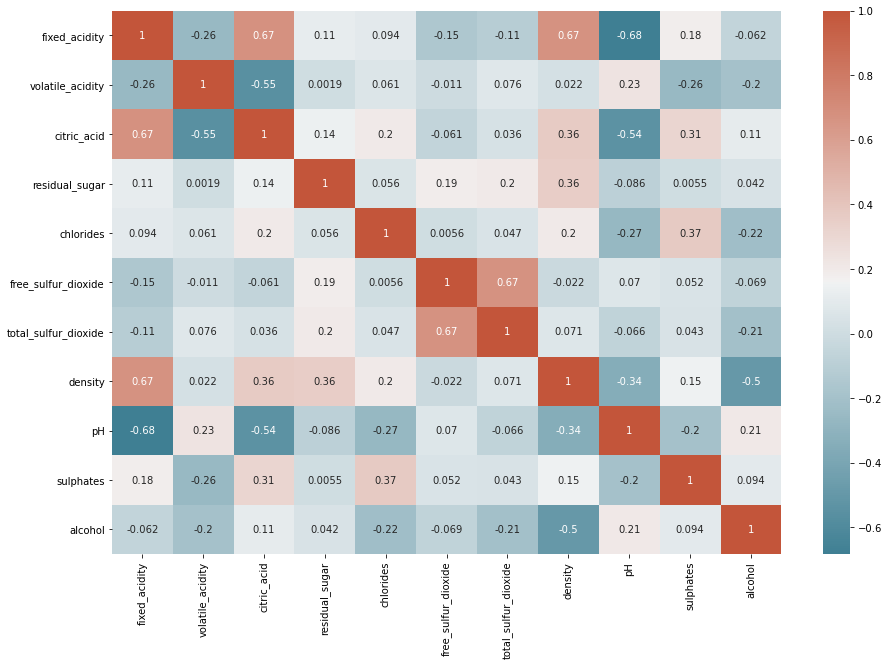

In [12]:
corr = features.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


> **Observation:**  
> ALCOHOL is the most correlated factor with the QUALITY with a linear relationship followed by SULPHATES and CITRIC ACID.  
VOLATILE ACIDITY is highest inversely correlated to the quality.  
There aren't any very highly correlated factors with value above 0.7, so we don't need to drop any columns from our feature set.

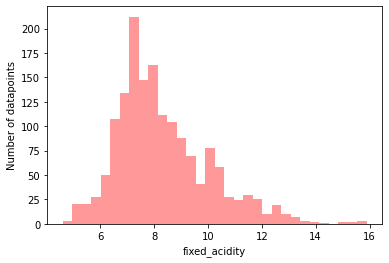

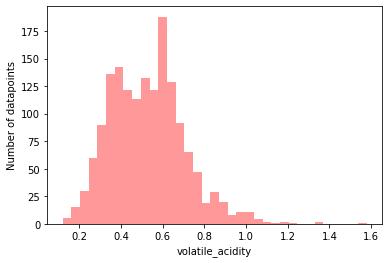

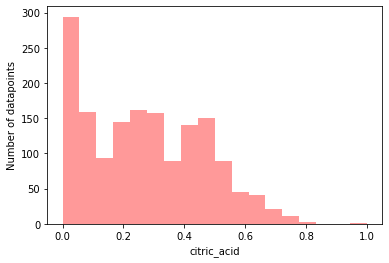

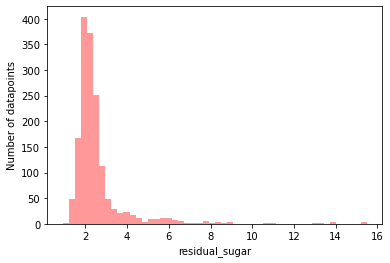

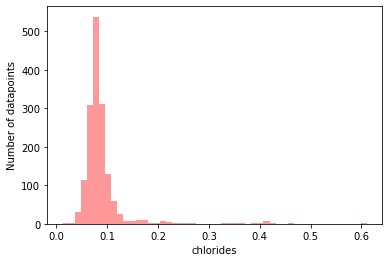

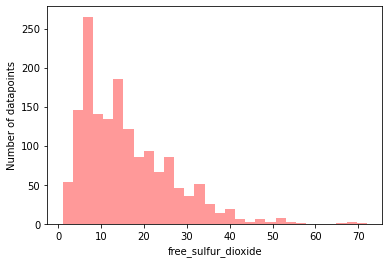

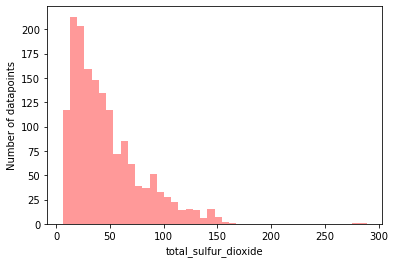

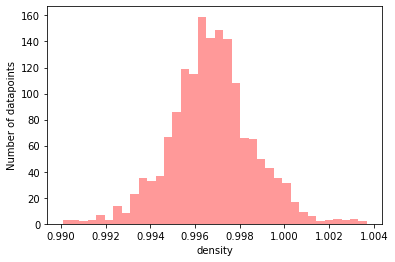

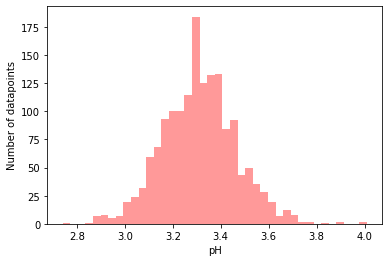

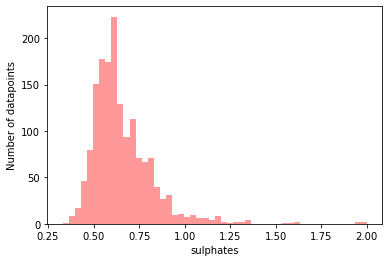

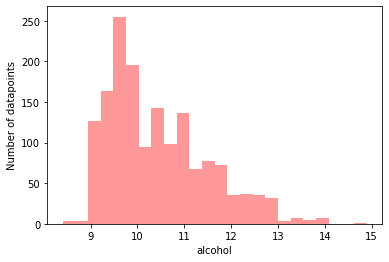

In [13]:
def histograms(attribute):
    att = features[attribute].values
    sns.distplot(a=data[attribute], kde=False, color='r')
    plt.ylabel("Number of datapoints")
    plt.show()

for col in features.columns:
    histograms(col)

> **Observation:** 
> We can see that the features are closely packed with the presence of some outliers.

### Splitting the data into train and test set.

In [14]:
features_train, features_test, y_train, y_test = train_test_split(features, labels_enc, 
                                                                  train_size=0.7, random_state=42)

**Scaling the raw data** 

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(features_train)
X_test = scaler.transform(features_test)

# Tensorflow Estimator DNN Implementation

**Defining the feature columns for the DNN Model**

In [16]:
fixed_acidity = fc.numeric_column('fixed_acidity')
volatile_acidity = fc.numeric_column('volatile_acidity')
citric_acid = fc.numeric_column('citric_acid')
residual_sugar = fc.numeric_column('residual_sugar')
chlorides = fc.numeric_column('chlorides')
free_sulfur_dioxide = fc.numeric_column('free_sulfur_dioxide')
total_sulfur_dioxide = fc.numeric_column('total_sulfur_dioxide')
density = fc.numeric_column('density')
pH = fc.numeric_column('pH')
sulphates = fc.numeric_column('sulphates')
alcohol = fc.numeric_column('alcohol')

feature_cols=[fixed_acidity,
              volatile_acidity,
              citric_acid,
              residual_sugar,
              chlorides,
              free_sulfur_dioxide,
              total_sulfur_dioxide,
              density,
              pH,
              sulphates,
              alcohol]

**Defining the input functions for training and validation**

In [17]:
def train_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((dict(pd.DataFrame(X_train, columns=features.columns)), y_train))
    dataset = dataset.shuffle(1000).repeat().batch(25)
    return dataset
def eval_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((dict(pd.DataFrame(X_test, columns=features.columns)), y_test))
    return dataset.shuffle(1000).repeat().batch(5)

**Defining the DNN model with 2 hidden layers of 64 and 32 nodes respectively**

In [18]:
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_cols,
    hidden_units=[64,32],
    optimizer=tf.optimizers.Adam(0.001),
    n_classes=6
)

Metal device set to: Apple M1
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/h8/tlp8kyzd4v910rbg173b0g0m0000gn/T/tmphvye3obf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


2022-02-06 22:52:22.985226: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-06 22:52:22.985716: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


**Training the model**

In [19]:
classifier.train(input_fn=lambda: train_input_fn(), steps=5000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


2022-02-06 22:52:25.666365: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-06 22:52:25.666387: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-02-06 22:52:25.682672: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-06 22:52:25.683932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-06 22:52:25.771688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-06 22:52:25.781464: I tensorflow/core/grappler/o

INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/h8/tlp8kyzd4v910rbg173b0g0m0000gn/T/tmphvye3obf/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 1.9601277, step = 0


2022-02-06 22:52:25.904662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-06 22:52:25.938898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-06 22:52:25.950038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-06 22:52:26.088480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:global_step/sec: 175.57
INFO:tensorflow:loss = 1.5816991, step = 100 (0.570 sec)
INFO:tensorflow:global_step/sec: 159.161
INFO:tensorflow:loss = 0.90306306, step = 200 (0.628 sec)
INFO:tensorflow:global_step/sec: 194.93
INFO:tensorflow:loss = 1.0819321, step = 300 (0.515 sec)
INFO:tensorflow:global_step/sec: 203.941
INFO:tensorflow:loss = 0.85138494, step = 400 (0.489 sec)
INFO:tensorflow:global_step/sec: 190.531
INFO:tensorflow:loss = 1.0203983, step = 500 (0.526 sec)
INFO:tensorflow:global_step/sec: 193.871
INFO:tensorflow:loss = 0.9132171, step = 600 (0.515 sec)
INFO:tensorflow:global_step/sec: 194.319
INFO:tensorflow:loss = 0.91044676, step = 700 (0.514 sec)
INFO:tensorflow:global_step/sec: 202.389
INFO:tensorflow:loss = 0.7176483, step = 800 (0.495 sec)
INFO:tensorflow:global_step/sec: 199.382
INFO:tensorflow:loss = 0.66608727, step = 900 (0.500 sec)
INFO:tensorflow:global_step/sec: 195.493
INFO:tensorflow:loss = 0.55974346, step = 1000 (0.512 sec)
INFO:tensorflow:

**Evaluating the model on test set**

In [20]:
eval_results = classifier.evaluate(input_fn=eval_input_fn, steps=1)
eval_results

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-02-06T22:52:55
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/h8/tlp8kyzd4v910rbg173b0g0m0000gn/T/tmphvye3obf/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Inference Time : 0.14894s
INFO:tensorflow:Finished evaluation at 2022-02-06-22:52:55
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.8, average_loss = 0.5908356, global_step = 5000, loss = 0.5908356
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /var/folders/h8/tlp8kyzd4v910rbg173b0g0m0000gn/T/tmphvye3obf/model.ckpt-5000


2022-02-06 22:52:55.308361: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-06 22:52:55.308377: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-02-06 22:52:55.318419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-06 22:52:55.326473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-06 22:52:55.332149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-06 22:52:55.33

{'accuracy': 0.8,
 'average_loss': 0.5908356,
 'loss': 0.5908356,
 'global_step': 5000}

> #### OBSERVATION:  
The DNN classifier did decent on the data with 0.8 accuracy. As the data has six output classes with the qualities 3,4, and 8 having very less data points, the model might not be able to fit to those qualities accurately and the performance degrades while classifying those qualities.
&nbsp;  
&nbsp;

# Tensorflow Keras Neural Network

**Defining the features and labels and doing one hot encoding on the labels**

In [21]:
X = features.values
y = labels.values
le = LabelEncoder()
y = le.fit_transform(y)

**Splitting the data into test and train set and scaling the features**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_train_cat = to_categorical(y_train, 6)
y_test_cat = to_categorical(y_test, 6)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Defining the model with 4 dense layers with 3 having relu activation function and the last layer with sigmoid activation function**

In [23]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(63, activation='relu', input_shape=[11]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(6, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Training the model**

In [24]:
model.fit(X_train,
          y_train_cat,
          epochs=100,
          validation_data=(X_test,y_test_cat),
          callbacks=[early_stopping],
          verbose=1)

2022-02-06 22:53:38.126334: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
16/35 [============>.................] - ETA: 0s - loss: 1.7891 - accuracy: 0.2754

2022-02-06 22:53:38.390206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 1s 12ms/step - loss: 1.7133 - accuracy: 0.3199 - val_loss: 1.5855 - val_accuracy: 0.4021
Epoch 2/100
 9/35 [======>.......................] - ETA: 0s - loss: 1.5411 - accuracy: 0.4271

2022-02-06 22:53:38.781982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 0s 9ms/step - loss: 1.5038 - accuracy: 0.4307 - val_loss: 1.3922 - val_accuracy: 0.5104
Epoch 3/100
35/35 [==============================] - 0s 9ms/step - loss: 1.2569 - accuracy: 0.5550 - val_loss: 1.1154 - val_accuracy: 0.5583
Epoch 4/100
35/35 [==============================] - 0s 9ms/step - loss: 1.0492 - accuracy: 0.5880 - val_loss: 1.0158 - val_accuracy: 0.5542
Epoch 5/100
35/35 [==============================] - 0s 9ms/step - loss: 0.9880 - accuracy: 0.6282 - val_loss: 0.9903 - val_accuracy: 0.5646
Epoch 6/100
35/35 [==============================] - 0s 9ms/step - loss: 0.9554 - accuracy: 0.6399 - val_loss: 0.9785 - val_accuracy: 0.5688
Epoch 7/100
35/35 [==============================] - 0s 9ms/step - loss: 0.9381 - accuracy: 0.6408 - val_loss: 0.9673 - val_accuracy: 0.5750
Epoch 8/100
35/35 [==============================] - 0s 9ms/step - loss: 0.9229 - accuracy: 0.6408 - val_loss: 0.9593 - val_accuracy: 0.5750
Epoch 9/100
35/35 [======

> #### OBSERVATION:  
We can observe that the model did an early stopping at epoch # with an accuracy of over 70% on the training data.  
Although the validation accuracy doesn't grow much and is around 60% over training.
&nbsp;  
&nbsp;

## Plotting the Loss and Accuracy for Training and Validation sets 

<AxesSubplot:>

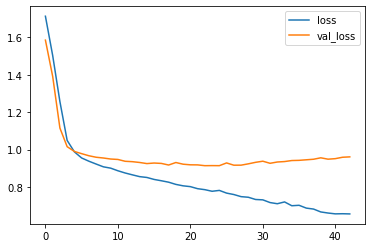

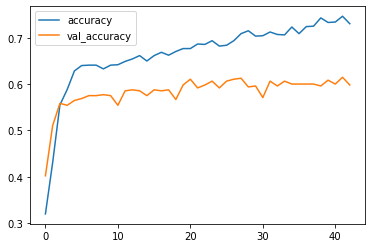

In [25]:
losses = pd.DataFrame(model.history.history)

losses[['loss','val_loss']].plot()
losses[['accuracy','val_accuracy']].plot()

> #### OBSERVATION:  
It if observable from the graph that both the loss and accuracy on the training set drop and increase respectively indicating some overfitting.  
&nbsp;  
&nbsp;  
The Validation set loss and accuracy stay at flat graph after around 20 epochs with values around 0.9 and 60% respectively.
&nbsp;  
&nbsp;

**Checking the performance metrics**

In [26]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test_cat,verbose=0))

['loss', 'accuracy']
[0.9142153859138489, 0.5979167222976685]


> As mentioned above in the observation for graphs, the Loss for the model is 0.91 and Accuracy of 60%.

**Checking performance metrics for each quality class**

In [27]:
predictions = le.inverse_transform(np.argmax(model.predict(X_test), axis=-1))
print(classification_report(le.inverse_transform(y_test),
                            predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.66      0.72      0.69       195
           6       0.56      0.64      0.60       200
           7       0.46      0.31      0.37        61
           8       0.00      0.00      0.00         6

    accuracy                           0.60       480
   macro avg       0.28      0.28      0.28       480
weighted avg       0.56      0.60      0.58       480



2022-02-06 22:54:51.638088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


> #### OBSERVATION:  
As we can see the performance metrics for quality 3,4, and 8 are poor due to the lack of the data and the model is not able to fit to these classes.   
&nbsp;  
&nbsp;  
The performances metrices for quality 5,6, and 7 are decent, but due to low performance of the above mentioned classes is low, the overall accuracy is 60%.
&nbsp;  
&nbsp;

## Conclusion:  
- Both the models had a moderate accuracy of above 60% and 80%. The Keras ANN model had an increased training accuracy of 75% on the trainig set but the test set validation accuracy of 60%.  
- Loss for DNN model is also less than the Keras model with values 0.6 and 0.9 respectively.  
- The lack of data for quality classes 3,4, and 8 is causing poor performance when it comes to classifying, so the overall accuracy of the model is brought down. More data points for these classes will help in building a model with better accuracy.